<a href="https://colab.research.google.com/github/emilychiu7/micro_cred_da_winter_2022/blob/main/python/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [40]:
type(df)

pandas.core.frame.DataFrame

In [41]:
# 397 rows = 397 employees
# 7 columns
df.shape

(397, 7)

In [42]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [43]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [44]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [45]:
# Mean of all salaries
df.salary.mean()

113706.45843828715

In [46]:
# Median of all salaries
df.salary.median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [47]:
new_df = df.filter(items=['sex','salary'])
print(new_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [48]:
#Filter dataframe by Males' salary
male_df = df[(df.sex == 'Male')].filter(items=['sex','salary'])
print(male_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[358 rows x 2 columns]


In [49]:
#Males' median salary
MMS = male_df.salary.median()
print(MMS)

108043.0


Finding the Median salary for all females

In [50]:
#Filter dataframe by Females' salary
female_df = df[(df.sex == 'Female')].filter(items=['sex','salary'])
print(female_df)

        sex  salary
9    Female  129000
19   Female  137000
24   Female   74830
34   Female   80225
35   Female   77000
47   Female  151768
48   Female  140096
52   Female   74692
63   Female  103613
68   Female  111512
84   Female  122960
90   Female   97032
103  Female  127512
114  Female  105000
119  Female   73500
123  Female   62884
127  Female   72500
132  Female   77500
133  Female   72500
148  Female  144651
153  Female  103994
179  Female   92000
186  Female  103750
218  Female  109650
230  Female   91000
231  Female   73300
233  Female  117555
237  Female   63100
245  Female   90450
253  Female   77500
254  Female  116450
274  Female   78500
316  Female   71065
323  Female  161101
332  Female  105450
334  Female  104542
341  Female  124312
358  Female  109954
361  Female  109646


In [51]:
#Females' median salary
FMS = female_df.salary.median()
print(FMS)

103750.0


Comparing the Mean salary of Males and Females

In [52]:
#Find mean of each gender
mean_male = male_df.salary.mean()
mean_m = '{:.2f}'.format(mean_male)
print(mean_m)

mean_female = female_df.salary.mean()
mean_f = '{:.2f}'.format(mean_female)
print(mean_f)

115090.42
101002.41


In [53]:
# The difference between mean salaries of male and female
dif = mean_male - mean_female
diff = '{:.2f}'.format(dif)
print('The difference between mean salaries of male and female:$',diff)

The difference between mean salaries of male and female:$ 14088.01


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [54]:
#Create new dataframe and filter to professors at least 20 years experience
more_exp = df[df['yrs.service'] >= 20]
print(more_exp)

     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
3             4  Prof          B             45           39  Male  115000
4             5  Prof          B             40           41  Male  141500
6             7  Prof          B             30           23  Male  175000
7             8  Prof          B             45           45  Male  147765
8             9  Prof          B             21           20  Male  119250
..          ...   ...        ...            ...          ...   ...     ...
384         385  Prof          A             27           21  Male  125192
386         387  Prof          A             29           27  Male  139219
388         389  Prof          A             38           36  Male  119450
392         393  Prof          A             33           30  Male  103106
394         395  Prof          A             42           25  Male  101738

[157 rows x 7 columns]


In [55]:
#Find mean of salary of at least 20 yrs.service
m = more_exp['salary'].mean()
mean = '{:.2f}'.format(m)
print(mean)

122520.66


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [56]:
#Create new dataframe and filter to professors at under 20 years experience
less_exp = df[df['yrs.service'] < 20]
print(less_exp)

     Unnamed: 0       rank discipline  ...  yrs.service     sex  salary
0             1       Prof          B  ...           18    Male  139750
1             2       Prof          B  ...           16    Male  173200
2             3   AsstProf          B  ...            3    Male   79750
5             6  AssocProf          B  ...            6    Male   97000
9            10       Prof          B  ...           18  Female  129000
..          ...        ...        ...  ...          ...     ...     ...
390         391       Prof          A  ...           19    Male  166605
391         392       Prof          A  ...           19    Male  151292
393         394       Prof          A  ...           19    Male  150564
395         396       Prof          A  ...           15    Male   95329
396         397   AsstProf          A  ...            4    Male   81035

[240 rows x 7 columns]


In [57]:
#Find mean of salary of under 20 yrs.service
l = less_exp['salary'].mean()
mean2 = '{:.2f}'.format(l)
print(mean2)

107940.50


In [58]:
dif2 = float(mean) - float(mean2)
dif3 = '{:.2f}'.format(dif2)
print('The mean salary professors that served at least 20 yrs was $',dif3,'more than the mean salary of professors that served under 20 yrs.')

The mean salary professors that served at least 20 yrs was $ 14580.16 more than the mean salary of professors that served under 20 yrs.


People who have salary of greater than or equal to 200,000

In [59]:
more_sal = df[df['salary'] >= 200000]
print(more_sal)

     Unnamed: 0  rank discipline  yrs.since.phd  yrs.service   sex  salary
43           44  Prof          B             38           38  Male  231545
249         250  Prof          A             29            7  Male  204000
364         365  Prof          A             43           43  Male  205500


Findings:


*   There are significantly more male professors than female professors in this dataset.
*   Male professors make a median salary of 108,043 dollars, which is slightly higher than female professors, which has a median salary of 103,750 dollars.
*   Male professors make a slightly higher average salary then females by 14,088.01 dollars.
*   Professors who have served at least 20 years make a higher average salary than professors who have served under 20 years by a difference of 14,580.16 dollars. 



# Rename values, subset columns, etc

In [60]:
#Rename columns
newdf = df.rename(columns={'Unnamed: 0':'index','rank':'position','yrs.since.phd':'yrs_post_phd','yrs.service':'yrs_exp'})
print(newdf)

     index  position discipline  yrs_post_phd  yrs_exp   sex  salary
0        1      Prof          B            19       18  Male  139750
1        2      Prof          B            20       16  Male  173200
2        3  AsstProf          B             4        3  Male   79750
3        4      Prof          B            45       39  Male  115000
4        5      Prof          B            40       41  Male  141500
..     ...       ...        ...           ...      ...   ...     ...
392    393      Prof          A            33       30  Male  103106
393    394      Prof          A            31       19  Male  150564
394    395      Prof          A            42       25  Male  101738
395    396      Prof          A            25       15  Male   95329
396    397  AsstProf          A             8        4  Male   81035

[397 rows x 7 columns]


# Create some simple visualizations showing some simple statistics

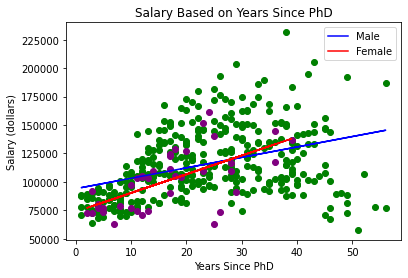

In [61]:
#Scatter plot of years since PhD to salary
newdf.plot(x ='yrs_post_phd', y = 'salary', kind = 'scatter')

#Color-code gender on scatter plot
mendf = newdf[newdf['sex'] == 'Male']
womendf = newdf[newdf['sex'] == 'Female']
plt.scatter(mendf['yrs_post_phd'],mendf.salary,color = 'green')
plt.scatter(womendf['yrs_post_phd'],womendf.salary,color = 'purple')

#Create line of best fit for genders
m1, b1 = np.polyfit(mendf['yrs_post_phd'], mendf.salary, 1)
plt.plot(mendf['yrs_post_phd'], m1* mendf['yrs_post_phd'] + b1, color = 'blue')
m2, b2 = np.polyfit(womendf['yrs_post_phd'], womendf.salary, 1)
plt.plot(womendf['yrs_post_phd'], m2*womendf['yrs_post_phd'] + b2, color = 'red')

#Label graph
plt.title('Salary Based on Years Since PhD')
plt.xlabel('Years Since PhD')
plt.ylabel('Salary (dollars)')
plt.legend(['Male',"Female"])
plt.show()


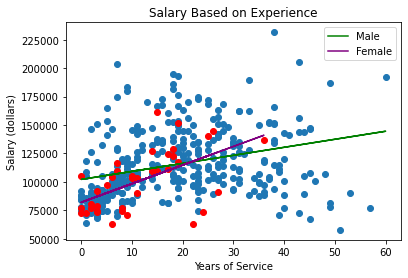

In [62]:
#Scatter plot of years of experience to salary
#Color-code gender on scatter plot
plt.scatter(mendf['yrs_exp'],mendf.salary)
plt.scatter(womendf['yrs_exp'],womendf.salary,color = 'red')

#Label scatter plot
plt.title('Salary Based on Experience')
plt.xlabel('Years of Service')
plt.ylabel('Salary')
plt.legend(['Male',"Female"])

#Create line of best fit for genders
m1, b1 = np.polyfit(mendf['yrs_exp'], mendf.salary, 1)
plt.plot(mendf['yrs_exp'], m1* mendf['yrs_exp'] + b1, color = 'green')
m2, b2 = np.polyfit(womendf['yrs_exp'], womendf.salary, 1)
plt.plot(womendf['yrs_exp'], m2*womendf['yrs_exp'] + b2, color = 'purple')

#Label graph
plt.title('Salary Based on Experience')
plt.xlabel('Years of Service')
plt.ylabel('Salary (dollars)')
plt.legend(['Male',"Female"])
plt.show()

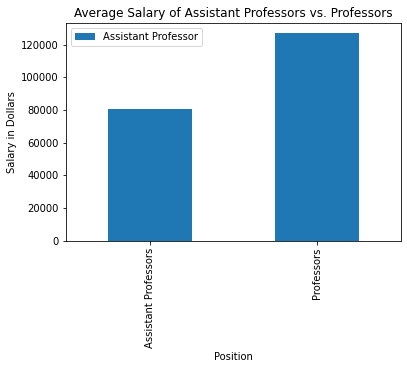

In [63]:
#Filter Professor and Assistant Professor positions
aprof_df = newdf[(newdf.position == 'AsstProf')].filter(items=['position','salary'])
prof_df = newdf[(newdf.position == 'Prof')].filter(items=['position','salary'])

#Calculate mean salary between Assistant Professors and Professors
mean_apsalary = aprof_df.salary.mean()
mean_psalary = prof_df.salary.mean()

#Create Series for mean salary for positions
s = pd.Series([mean_apsalary,mean_psalary], index=['Assistant Professors','Professors'])

#Plot a bar graph and label axis
s.plot(kind='bar')
plt.title('Average Salary of Assistant Professors vs. Professors')
plt.xlabel('Position')
plt.ylabel('Salary in Dollars')
plt.legend(['Assistant Professor',"Professor"])
plt.show()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

*In the scatter plot, 'Salary Based on Years Since PhD':*
* We can observe that females have a faster growth in salary than males as their years since they received their PhD increases. This is based off of the regression lines. However, this may not be accurate due to significantly lower data counts of females as opposed to males. We can see this because of the significantly less purple value points than green value points for males.
* Regardless of gender, we can see that the more years since PhD, the higher the salary of the professor.


*I also discovered that the scatterplot, 'Salary Based on Experience':*
* We can observe similar trends to the scatterplot,'Salary Based on Years Since PhD'. Females have a faster growth in salary, but this may not be accurate due to significantly less data of females.
* Regardless of gender, we can see that the more years of service, the higher the salary of the professor.

These similar trends may indicate that years since PhD and years of service may be correlational.

*In the bar graph, 'Average Salary of Assistant Professors vs. Professors':*
* We can see that professors on average are being paid more than the assistant professors by about $40,000.